In [1]:
library(GenomicRanges)
library(rtracklayer)
library(ggplot2)
library(magrittr)
library(stringr)
library(dplyr)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’
Loading required

In [2]:
setwd("/mnt/scratch/mateja/Early_modern_humans/nuclear_captures/Archaic_admixture_final/Altai_homozygous_and_YRI_at_high_frequency/")

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
options(jupyter.plot_mimetypes = setdiff(getOption('jupyter.plot_mimetypes'), 'image/svg+xml'))

In [4]:
# Load a BED file with allele states in an individual. Annotate each
# such site with B statistic value and a binary value describing if
# this individual carries an archaic-like SNP.
load_snps <- function(bed_filename, bstat_sites) {
    # first load the informative states in a given individual
    test_bed <- import.bed(bed_filename, extraCols=c(afr="character", arch="character", test="character"))
    
    # take an overlap of these sites and sites for which we have
    # a B statistic value available
    hits <- findOverlaps(test_bed, bstat_sites)
    
    # take only those sites for which we have a B statistic value
    test_bed <- test_bed[queryHits(hits)]
    
    # assign to them the corresponding B statistic values
    test_bed$bstat <- bstat_sites[subjectHits(hits)]$bstat
    test_bed$bin <- factor(bstat_sites[subjectHits(hits)]$bin)
    
    # which sites carry an archaic-like snp?
    test_bed$archaic <- as.integer(test_bed$arch == test_bed$test)
    
    test_bed[, c("archaic", "bstat", "bin")]
}


# Calculate the proportion of sharing of derived allele in a given bin.
admixture_prop <- function(sites, bin_i) {
    bin_sites <- sites[which(sites$bin == bin_i)]
    
    mean(bin_sites$archaic) * 100
}

# For a given vector of B statistic values, return a vector of bins based
# on the specified number of bins.
get_bin_values <- function(bstat_values, n_bins) {
    qs <- quantile(bstat_values, prob=seq(0, 1, length.out=n_bins + 1))
    
    findInterval(bstat_values, vec=qs, rightmost.closed=TRUE)
}

# Extract the sample name from the given path to the BED file.
get_sample_name <- function(bed_file_path) {
    basename(bed_file_path) %>% str_replace("\\.bed", "") %>% str_split("_") %>% .[[1]] %>% .[1]
}

# Get a p-value from the lm model.
get_lm_pvalue <- function(lm_result) {
    fs <- summary(reg)$fstatistic
    as.numeric(pf(fs[1], fs[2], fs[3], lower.tail=FALSE))
}

In [5]:
# load the SNP B statistic anotation BED file
bstat_sites <- import.bed("/mnt/scratch/mp/EMH/Bstat/martins_snp_bstat_values.bed", extraCols=c(bstat="integer"))

# Distribution of B statistic values for all SNPs on the array

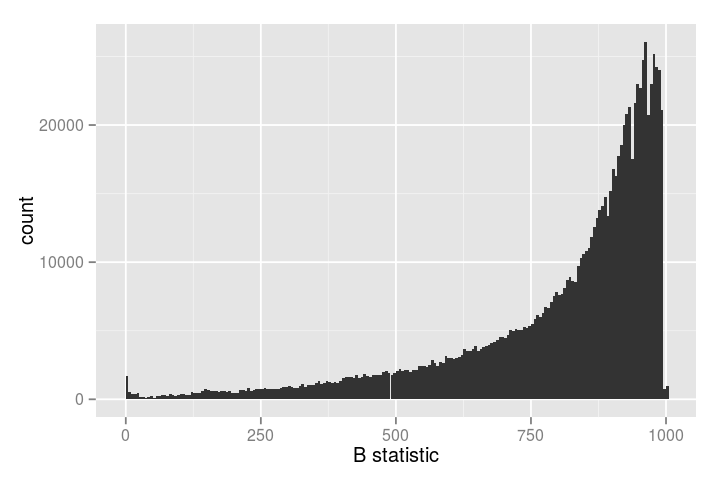

In [6]:
qplot(bstat_sites$bstat, binwidth=5, xlab="B statistic")

<br><br><br><br><br><br><br><br><br><br>
# Correlation analysis &mdash; 50 bins

In [7]:
results_df <- c()

In [8]:
n_bins <- 25

## Assign SNPs into a specified number of bins

In [9]:
# assign each SNP into a bin based on its B statistic value
bstat_sites$bin <- get_bin_values(bstat_sites$bstat, n_bins)

## Distribution of number of SNPs in each bin of B statistic

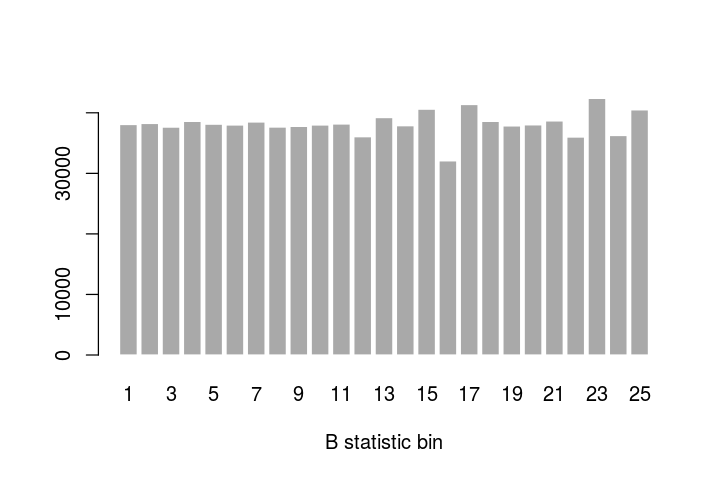

In [10]:
barplot(table(bstat_sites$bin), xlab="B statistic bin", col="darkgrey", border="white")

<br><br><br><br><br>
# Correlation analysis based on positions pulled from the array

highcov//Australian.bed 
number of sites: 476538 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37509 -0.18639 -0.08667  0.14086  0.75498 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.71814    0.11729  14.648 3.76e-13 ***
bin_indices  0.02608    0.00789   3.305  0.00309 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2845 on 23 degrees of freedom
Multiple R-squared:  0.322,	Adjusted R-squared:  0.2925 
F-statistic: 10.92 on 1 and 23 DF,  p-value: 0.003094


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 215, p-value = 0.002019
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4333333 



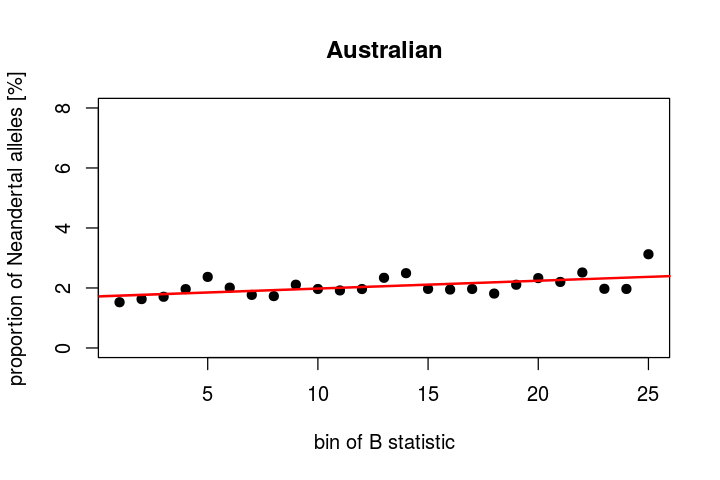

highcov//Dinka.bed 
number of sites: 476184 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07901 -0.03623 -0.00389  0.02447  0.16371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.125850   0.023872   5.272 2.38e-05 ***
bin_indices 0.007541   0.001606   4.696 9.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0579 on 23 degrees of freedom
Multiple R-squared:  0.4895,	Adjusted R-squared:  0.4673 
F-statistic: 22.06 on 1 and 23 DF,  p-value: 9.923e-05


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 230, p-value = 0.0001016
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5333333 



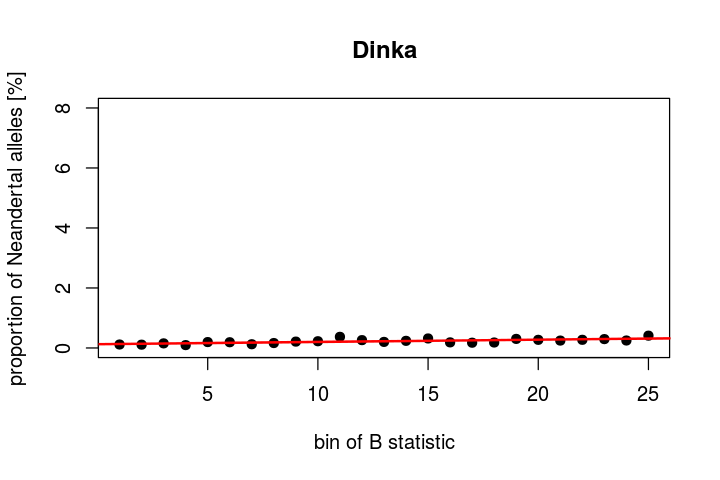

highcov//French.bed 
number of sites: 476387 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44167 -0.14292  0.03008  0.15722  0.37638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.036132   0.093702  11.058 1.11e-10 ***
bin_indices 0.039541   0.006303   6.273 2.12e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2273 on 23 degrees of freedom
Multiple R-squared:  0.6311,	Adjusted R-squared:  0.6151 
F-statistic: 39.35 on 1 and 23 DF,  p-value: 2.116e-06


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 242, p-value = 4.763e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6133333 



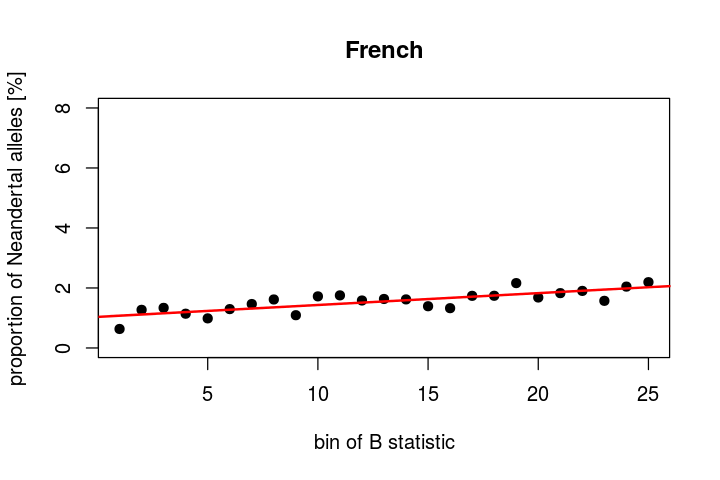

highcov//Han.bed 
number of sites: 476396 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44481 -0.14021 -0.03028  0.15353  0.44227 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.348921   0.105438  12.793 6.09e-12 ***
bin_indices 0.045367   0.007093   6.396 1.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2557 on 23 degrees of freedom
Multiple R-squared:  0.6401,	Adjusted R-squared:  0.6245 
F-statistic: 40.91 on 1 and 23 DF,  p-value: 1.583e-06


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 243, p-value = 3.571e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.62 



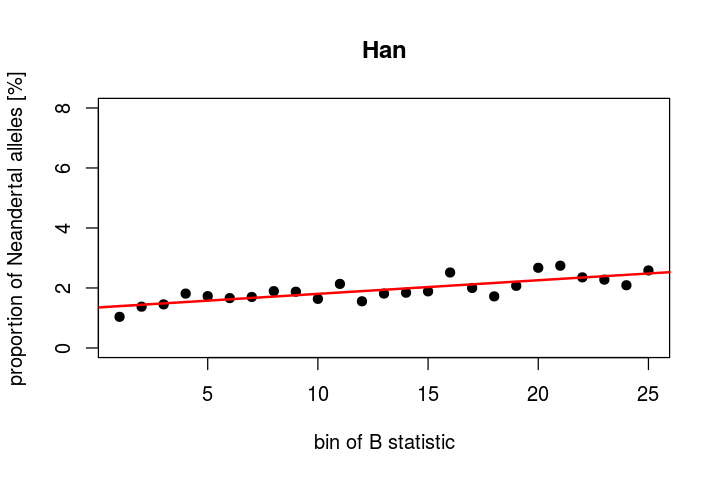

highcov//Karitiana.bed 
number of sites: 476308 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39865 -0.17800 -0.04311  0.14294  0.50459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.552453   0.100969  15.376 1.36e-13 ***
bin_indices 0.026580   0.006792   3.914 0.000697 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2449 on 23 degrees of freedom
Multiple R-squared:  0.3997,	Adjusted R-squared:  0.3736 
F-statistic: 15.32 on 1 and 23 DF,  p-value: 0.0006972


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 222, p-value = 0.0005531
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.48 



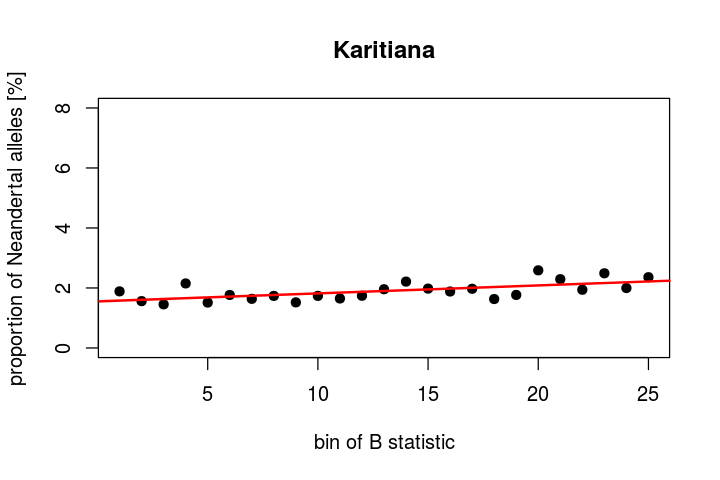

highcov//Mbuti.bed 
number of sites: 476488 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118442 -0.097496  0.004575  0.048841  0.182562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.313691   0.037871   8.283 2.35e-08 ***
bin_indices 0.018489   0.002547   7.258 2.19e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09185 on 23 degrees of freedom
Multiple R-squared:  0.6961,	Adjusted R-squared:  0.6829 
F-statistic: 52.67 on 1 and 23 DF,  p-value: 2.186e-07


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 254, p-value = 9.964e-08
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6933333 



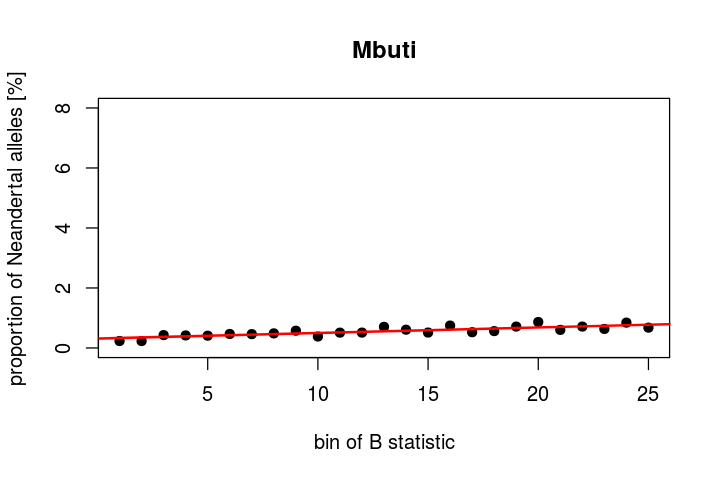

highcov//Papuan.bed 
number of sites: 476372 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48267 -0.19724 -0.08423  0.05648  1.38467 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.84875    0.17248  10.718 2.03e-10 ***
bin_indices  0.02034    0.01160   1.753   0.0929 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4183 on 23 degrees of freedom
Multiple R-squared:  0.1179,	Adjusted R-squared:  0.07954 
F-statistic: 3.074 on 1 and 23 DF,  p-value: 0.09288


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 184, p-value = 0.1183
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2266667 



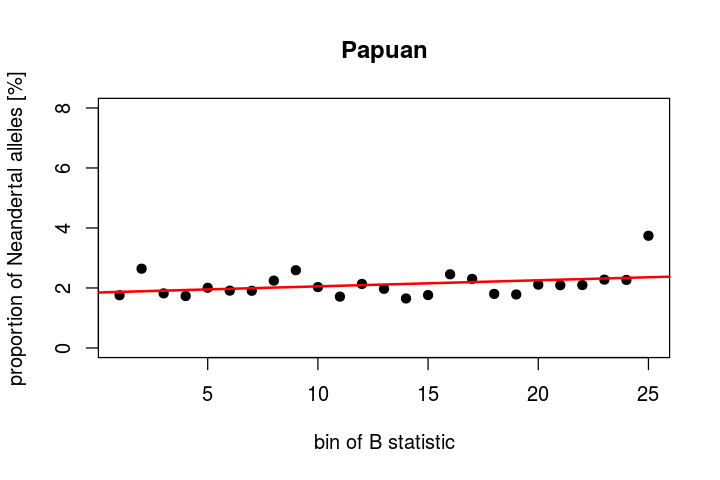

highcov//San.bed 
number of sites: 476489 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37839 -0.06794  0.00531  0.11689  0.21162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.708947   0.061766  11.478 5.34e-11 ***
bin_indices 0.014644   0.004155   3.525  0.00182 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1498 on 23 degrees of freedom
Multiple R-squared:  0.3507,	Adjusted R-squared:  0.3225 
F-statistic: 12.42 on 1 and 23 DF,  p-value: 0.001816


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 221, p-value = 0.0006723
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4733333 



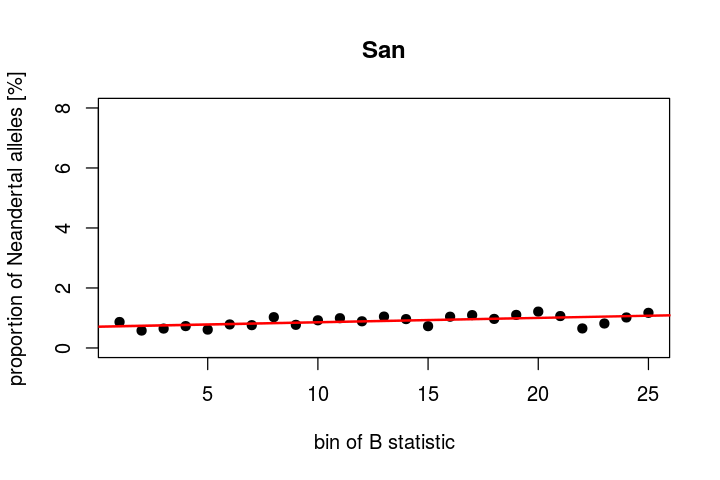

highcov//Sardinian.bed 
number of sites: 476438 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45443 -0.19032 -0.00151  0.12320  0.50880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.087099   0.106156   10.24 4.87e-10 ***
bin_indices 0.039631   0.007141    5.55 1.21e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2575 on 23 degrees of freedom
Multiple R-squared:  0.5725,	Adjusted R-squared:  0.5539 
F-statistic:  30.8 on 1 and 23 DF,  p-value: 1.205e-05


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 232, p-value = 6.387e-05
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5466667 



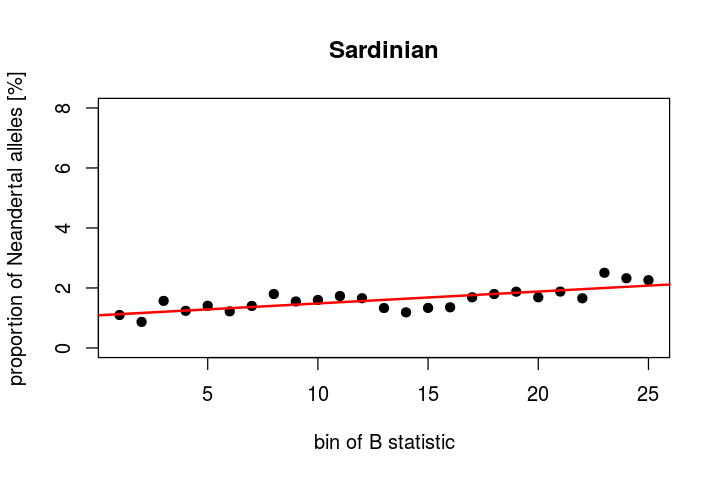

highcov//Ust-Ishim.bed 
number of sites: 476687 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6575 -0.2495 -0.1313  0.2561  0.7491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.217686   0.157347  14.094 8.37e-13 ***
bin_indices 0.002245   0.010584   0.212    0.834    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3816 on 23 degrees of freedom
Multiple R-squared:  0.001951,	Adjusted R-squared:  -0.04144 
F-statistic: 0.04497 on 1 and 23 DF,  p-value: 0.8339


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 146, p-value = 0.8715
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.02666667 



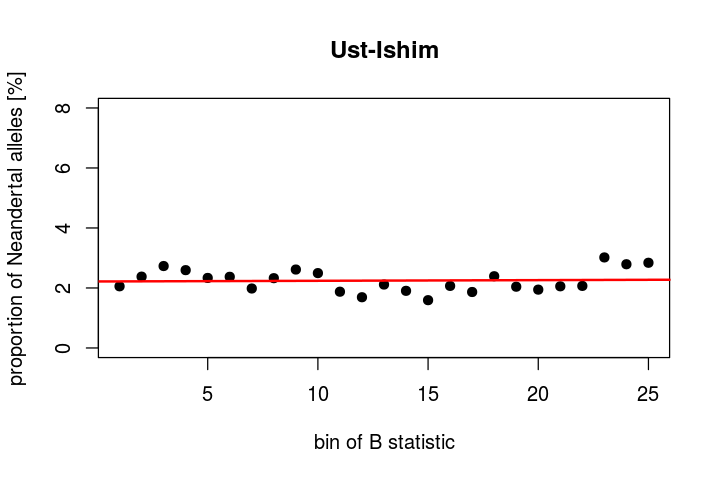

highcov//Yoruba.bed 
number of sites: 476467 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10120 -0.03328 -0.00129  0.03525  0.13787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.124609   0.023944   5.204 2.82e-05 ***
bin_indices 0.005022   0.001611   3.118  0.00483 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05807 on 23 degrees of freedom
Multiple R-squared:  0.2971,	Adjusted R-squared:  0.2666 
F-statistic: 9.723 on 1 and 23 DF,  p-value: 0.004834


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 213, p-value = 0.002839
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.42 



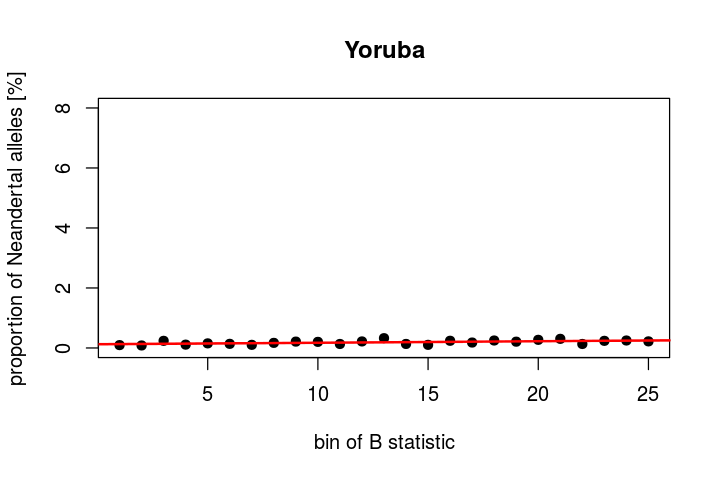

In [11]:
bed_files <- list.files("highcov/", pattern="*.bed$", full.names=TRUE)

for (bed_file in bed_files) {
    sample_name <- get_sample_name(bed_file)
    
    # load positions of SNPs and their assigned B statistic values and bins
    info_sites <- load_snps(bed_file, bstat_sites)
    info_sites_data <- as.data.frame(mcols(info_sites))

    # calculate the proportion of sharing of alleles with archaics
    bin_indices <- 1 : n_bins
    prop_values <- sapply(bin_indices, function(bin_i) { admixture_prop(info_sites, bin_i) })

    # perform linear regression and plot the data
    reg <- lm(prop_values ~ bin_indices)
    plot(bin_indices, prop_values, ylim=c(0, 8), main=sample_name, pch=19,
         xlab="bin of B statistic", ylab="proportion of Neandertal alleles [%]")
    abline(reg, col="red", lwd=2)
    
    # print out the summary statistics
    cat(bed_file, "\n==================================================\n")
    cat("number of sites:", length(info_sites), "\n")
        
    print(summary(reg))
    cat("\ncor.test for bins:\n")
    print(cor.test(prop_values, bin_indices, method="kendall"))
}

<br><br><br><br><br>
# EMH

In [12]:
n_sites_cutoff <- 70000

emh//AfontovaGora.bed 
number of sites: 58960 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46541 -0.13429  0.02814  0.10224  0.36643 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.476498   0.078497  18.810 1.83e-15 ***
bin_indices -0.006315   0.005280  -1.196    0.244    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1904 on 23 degrees of freedom
Multiple R-squared:  0.05855,	Adjusted R-squared:  0.01762 
F-statistic:  1.43 on 1 and 23 DF,  p-value: 0.2439


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 124, p-value = 0.2363
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1733333 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

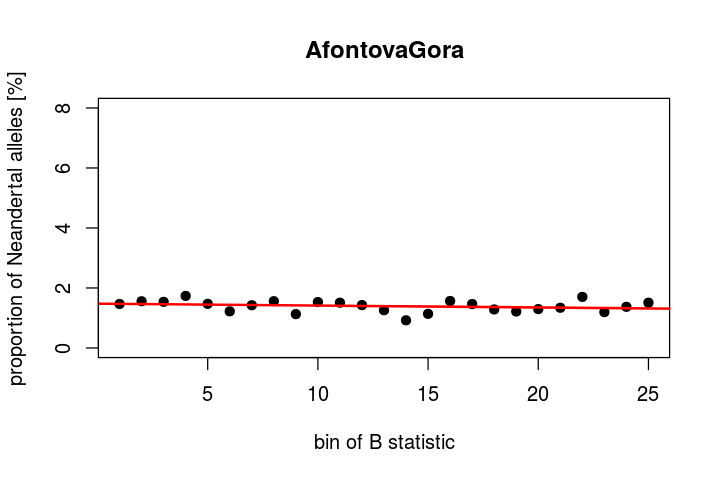

emh//Continenza.bed 
number of sites: 1056 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9999 -1.9467  0.4874  0.9510  3.3550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.888798   0.816863   2.312   0.0301 *
bin_indices 0.004829   0.054948   0.088   0.9307  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.981 on 23 degrees of freedom
Multiple R-squared:  0.0003357,	Adjusted R-squared:  -0.04313 
F-statistic: 0.007724 on 1 and 23 DF,  p-value: 0.9307


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = 0, p-value = 1
alternative hypothesis: true tau is not equal to 0
sample estimates:
tau 
  0 



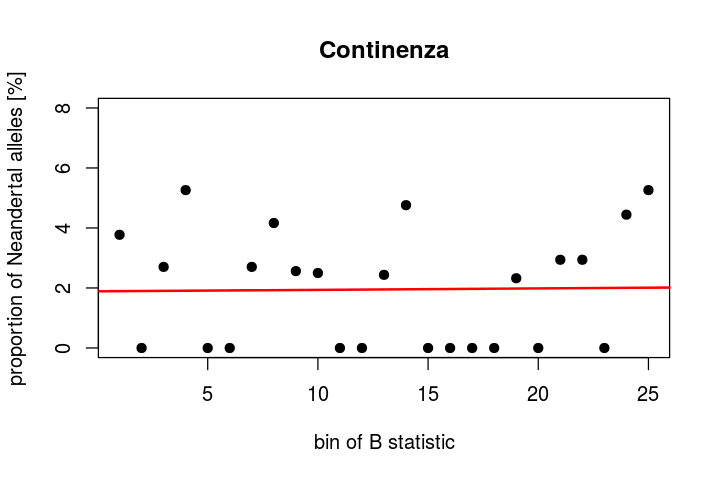

emh//DolniVestonice13.bed 
number of sites: 22727 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33969 -0.44983  0.00215  0.37343  0.97663 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.3256390  0.2603520   8.933 6.15e-09 ***
bin_indices -0.0006831  0.0175132  -0.039    0.969    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6314 on 23 degrees of freedom
Multiple R-squared:  6.613e-05,	Adjusted R-squared:  -0.04341 
F-statistic: 0.001521 on 1 and 23 DF,  p-value: 0.9692


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 150, p-value = 1
alternative hypothesis: true tau is not equal to 0
sample estimates:
tau 
  0 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

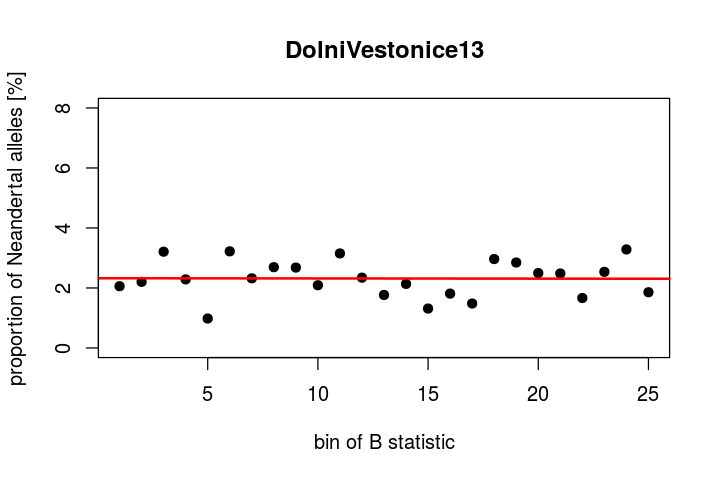

emh//DolniVestonice15.bed 
number of sites: 3629 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0349 -0.4511 -0.2689  0.3802  1.8306 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.92087    0.32007   6.002 4.04e-06 ***
bin_indices -0.01734    0.02153  -0.805    0.429    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7763 on 23 degrees of freedom
Multiple R-squared:  0.02742,	Adjusted R-squared:  -0.01486 
F-statistic: 0.6485 on 1 and 23 DF,  p-value: 0.4289


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = -0.81824, p-value = 0.4132
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1172544 



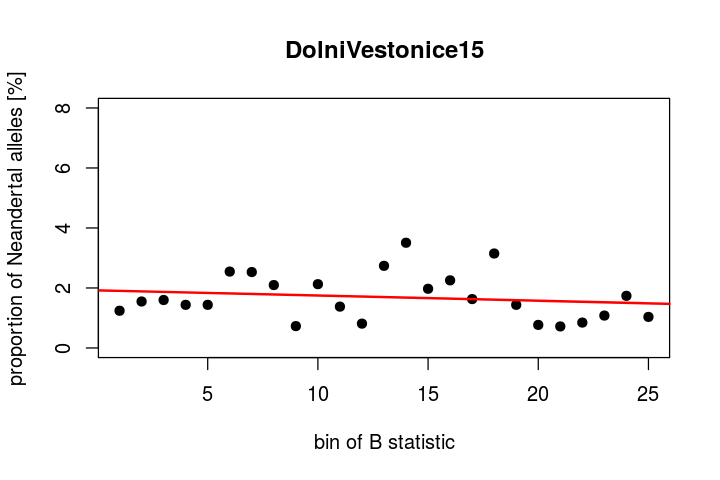

emh//DolniVestonice16.bed 
number of sites: 60614 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66798 -0.10799 -0.04041  0.16844  0.56524 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.090197   0.130485  16.019 5.73e-14 ***
bin_indices -0.001633   0.008777  -0.186    0.854    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3165 on 23 degrees of freedom
Multiple R-squared:  0.001503,	Adjusted R-squared:  -0.04191 
F-statistic: 0.03462 on 1 and 23 DF,  p-value: 0.854


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 139, p-value = 0.6273
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.07333333 



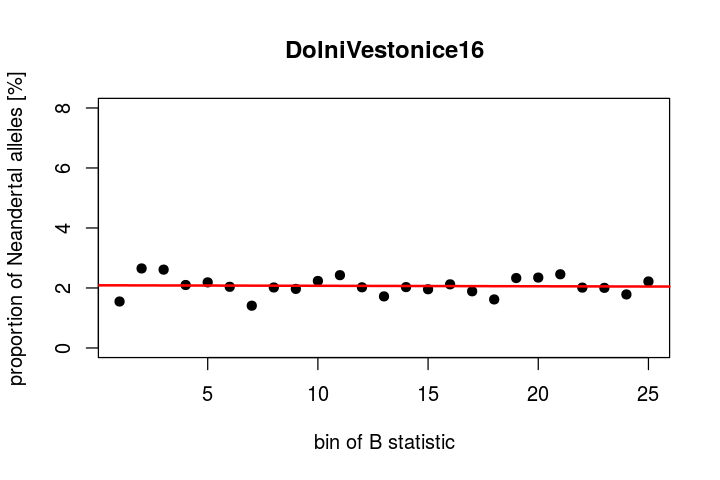

emh//DolniVestonice43.bed 
number of sites: 23183 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91978 -0.49416  0.07485  0.32519  1.01375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.86311    0.23174   8.040 3.94e-08 ***
bin_indices  0.01719    0.01559   1.102    0.282    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5621 on 23 degrees of freedom
Multiple R-squared:  0.05019,	Adjusted R-squared:  0.008894 
F-statistic: 1.215 on 1 and 23 DF,  p-value: 0.2817


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 166, p-value = 0.473
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1066667 



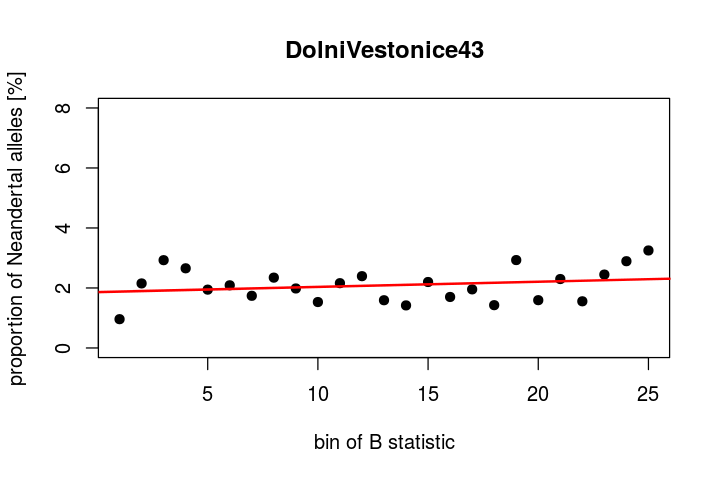

emh//ElMiron.bed 
number of sites: 153759 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77947 -0.18733 -0.08729  0.34276  0.65805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.71282    0.15674  10.928  1.4e-10 ***
bin_indices  0.03156    0.01054   2.993  0.00649 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3801 on 23 degrees of freedom
Multiple R-squared:  0.2804,	Adjusted R-squared:  0.2491 
F-statistic:  8.96 on 1 and 23 DF,  p-value: 0.006491


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 198, p-value = 0.02539
alternative hypothesis: true tau is not equal to 0
sample estimates:
 tau 
0.32 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

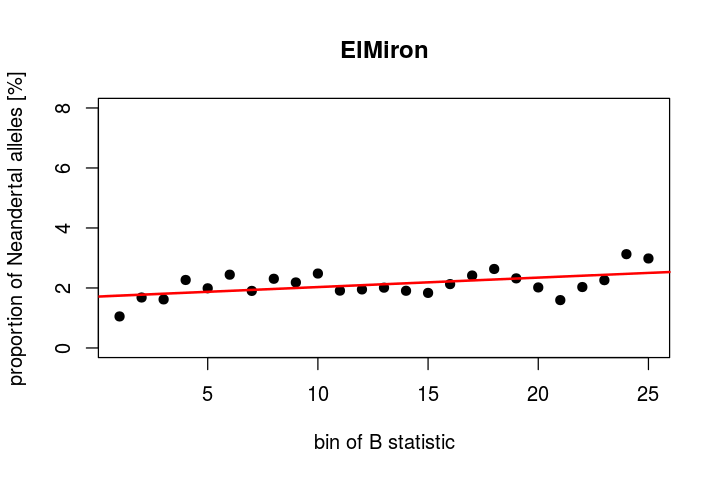

emh//Kostenki12.bed 
number of sites: 1206 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8609 -1.6595  0.0896  0.4467  4.9172 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.42146    0.87497   1.625    0.118
bin_indices  0.01831    0.05886   0.311    0.759

Residual standard error: 2.122 on 23 degrees of freedom
Multiple R-squared:  0.00419,	Adjusted R-squared:  -0.03911 
F-statistic: 0.09678 on 1 and 23 DF,  p-value: 0.7585


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = 0.074543, p-value = 0.9406
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.01134704 



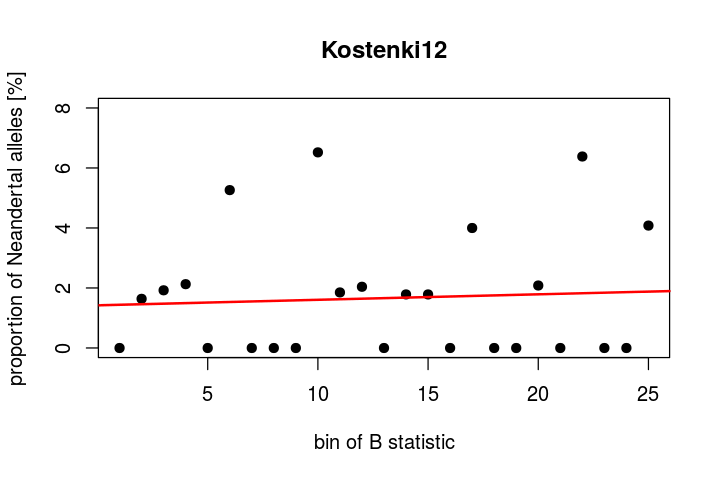

emh//Kostenki14.bed 
number of sites: 166733 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58151 -0.23784 -0.09506  0.28203  0.61440 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.26665    0.14916  15.196 1.74e-13 ***
bin_indices -0.01582    0.01003  -1.576    0.129    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3618 on 23 degrees of freedom
Multiple R-squared:  0.09752,	Adjusted R-squared:  0.05828 
F-statistic: 2.485 on 1 and 23 DF,  p-value: 0.1286


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 122, p-value = 0.2012
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1866667 



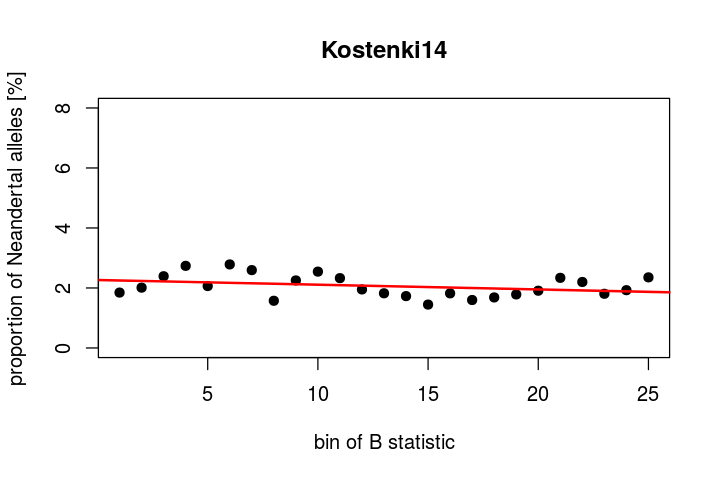

emh//Muierii.bed 
number of sites: 13828 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9884 -0.5309  0.2145  0.4362  1.4324 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.16349    0.26929   8.034 3.99e-08 ***
bin_indices  0.01417    0.01811   0.782    0.442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6531 on 23 degrees of freedom
Multiple R-squared:  0.02591,	Adjusted R-squared:  -0.01644 
F-statistic: 0.6118 on 1 and 23 DF,  p-value: 0.4421


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 166, p-value = 0.473
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1066667 



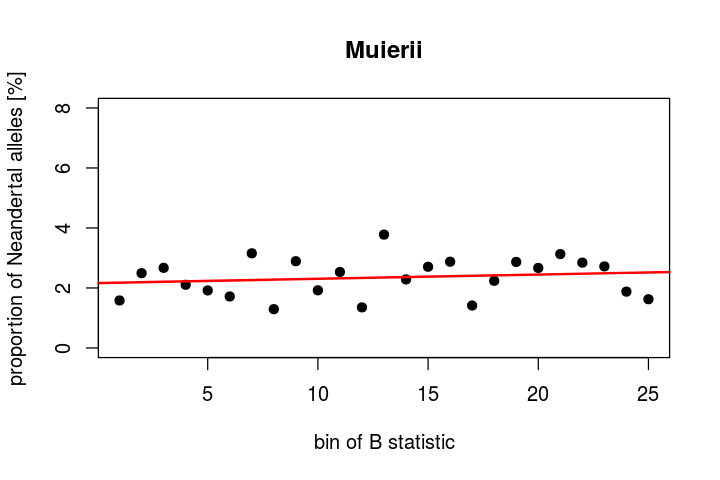

emh//Oase1.bed 
number of sites: 37614 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58489 -0.29384  0.03629  0.37812  1.81664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.39786    0.26982  20.005 4.81e-16 ***
bin_indices  0.01202    0.01815   0.662    0.514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6544 on 23 degrees of freedom
Multiple R-squared:  0.0187,	Adjusted R-squared:  -0.02396 
F-statistic: 0.4384 on 1 and 23 DF,  p-value: 0.5145


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 152, p-value = 0.9447
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.01333333 



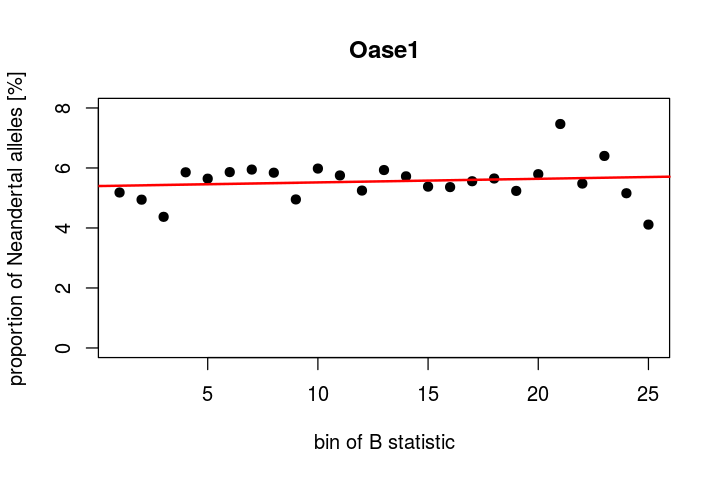

emh//Ostuni1.bed 
number of sites: 54537 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99454 -0.19948 -0.06262  0.39662  0.68633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.69785    0.17598   9.648  1.5e-09 ***
bin_indices  0.02429    0.01184   2.052   0.0517 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4268 on 23 degrees of freedom
Multiple R-squared:  0.1548,	Adjusted R-squared:  0.118 
F-statistic: 4.211 on 1 and 23 DF,  p-value: 0.05172


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 179, p-value = 0.1851
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1933333 



Warning message:
In cor.test.default(prop_values, bin_indices, method = "kendall"): Cannot compute exact p-value with ties

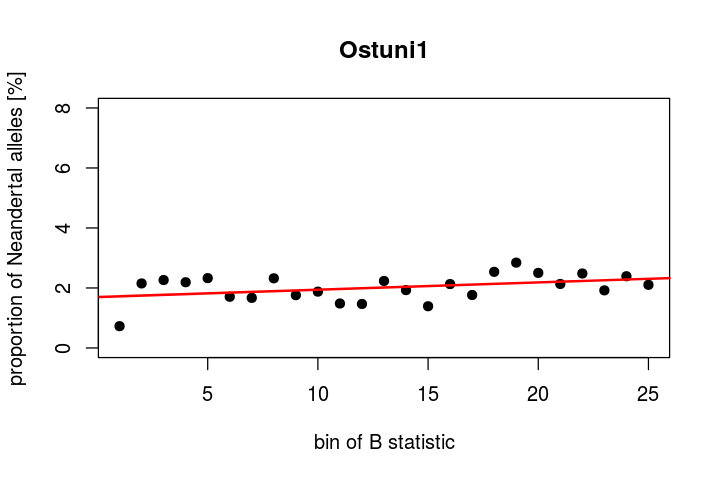

emh//Ostuni2.bed 
number of sites: 1629 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1395 -1.0615 -0.5862  1.0876  3.7926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.63025    0.66184   0.952    0.351
bin_indices  0.07187    0.04452   1.614    0.120

Residual standard error: 1.605 on 23 degrees of freedom
Multiple R-squared:  0.1018,	Adjusted R-squared:  0.06271 
F-statistic: 2.606 on 1 and 23 DF,  p-value: 0.1201


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
z = 1.5973, p-value = 0.1102
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2390928 



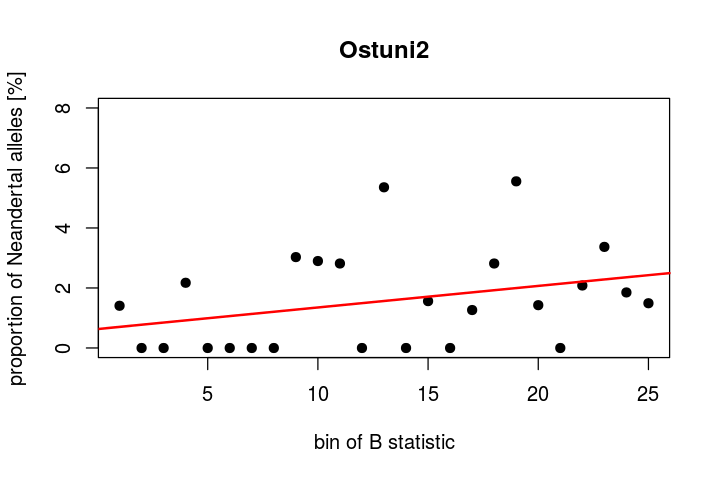

emh//Pavlov1.bed 
number of sites: 5652 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6885 -0.8116 -0.2719  0.6421  2.5374 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.119181   0.477351   4.439 0.000188 ***
bin_indices 0.001651   0.032110   0.051 0.959448    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.158 on 23 degrees of freedom
Multiple R-squared:  0.0001149,	Adjusted R-squared:  -0.04336 
F-statistic: 0.002642 on 1 and 23 DF,  p-value: 0.9594


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 157, p-value = 0.7638
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.04666667 



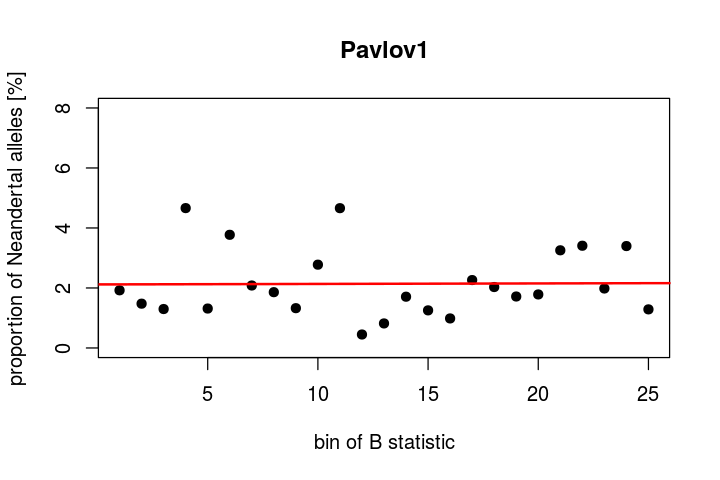

emh//Villabruna.bed 
number of sites: 169319 

Call:
lm(formula = prop_values ~ bin_indices)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38217 -0.17036 -0.00342  0.08489  0.65428 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.125288   0.107681  10.450 3.31e-10 ***
bin_indices 0.025971   0.007243   3.585  0.00156 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2612 on 23 degrees of freedom
Multiple R-squared:  0.3585,	Adjusted R-squared:  0.3306 
F-statistic: 12.86 on 1 and 23 DF,  p-value: 0.001565


cor.test for bins:

	Kendall's rank correlation tau

data:  prop_values and bin_indices
T = 217, p-value = 0.001418
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4466667 



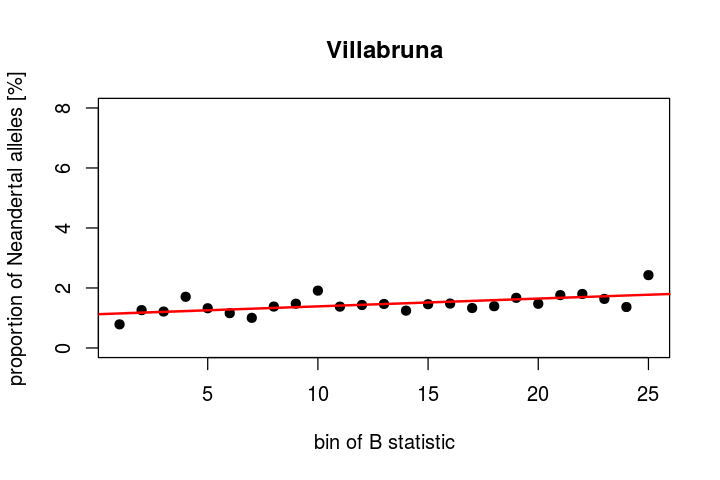

In [13]:
bed_files <- list.files("emh/", pattern="*.bed$", full.names=TRUE)

for (bed_file in bed_files) {
    sample_name <- get_sample_name(bed_file)
    
    # load positions of SNPs and their assigned B statistic values and bins
    info_sites <- load_snps(bed_file, bstat_sites)
    info_sites_data <- as.data.frame(mcols(info_sites))

    # if (length(info_sites) < n_sites_cutoff) next

    # calculate the proportion of sharing of alleles with archaics
    bin_indices <- 1 : n_bins
    prop_values <- sapply(bin_indices, function(bin_i) { admixture_prop(info_sites, bin_i) })

    # perform linear regression and plot the data
    reg <- lm(prop_values ~ bin_indices)
    plot(bin_indices, prop_values, ylim=c(0, 8), main=sample_name, pch=19,
         xlab="bin of B statistic", ylab="proportion of Neandertal alleles [%]")
    abline(reg, col="red", lwd=2)
    
    # run the Kendall's correlation
    cor_test <- cor.test(prop_values, bin_indices, method="kendall")
    
    # print out the summary statistics
    cat(bed_file, "\n==================================================\n")
    cat("number of sites:", length(info_sites), "\n")
        
    print(summary(reg))
    cat("\ncor.test for bins:\n")
    print(cor_test)
    
    # assign the values to the final dataframe
    results_df <- rbind(results_df, data.frame(sample=sample_name,
                                               n_sites=length(info_sites),
                                               lm_r2=summary(reg)$r.squared,
                                               lm_p=get_lm_pvalue(reg),
                                               cor_tau=cor_test$estimate,
                                               cor_p=cor_test$p.value,
                                               row.names=NULL))
}

In [14]:
results_df[1:10, ]

results_df[11:nrow(results_df), ]

,sample,n_sites,lm_r2,lm_p,cor_tau,cor_p
1,AfontovaGora,58960,0.05855381,0.2438682,-0.1733333,0.2362967
2,Continenza,1056,0.0003356922,0.93073,0,1
3,DolniVestonice13,22727,6.613411e-05,0.9692251,0,1
4,DolniVestonice15,3629,0.02742432,0.4288806,-0.1172544,0.4132187
5,DolniVestonice16,60614,0.00150303,0.8540219,-0.07333333,0.6272676
6,DolniVestonice43,23183,0.05019043,0.2816718,0.1066667,0.4730453
7,ElMiron,153759,0.2803514,0.006491107,0.32,0.02538707
8,Kostenki12,1206,0.004189981,0.7585366,0.01134704,0.9405781
9,Kostenki14,166733,0.09751817,0.1285723,-0.1866667,0.2011568
10,Muierii,13828,0.02590974,0.4420987,0.1066667,0.4730453


,sample,n_sites,lm_r2,lm_p,cor_tau,cor_p
11,Oase1,37614,0.01870246,0.5144973,0.01333333,0.9447431
12,Ostuni1,54537,0.1547509,0.0517171,0.1933333,0.1850583
13,Ostuni2,1629,0.1017677,0.1201072,0.2390928,0.1102003
14,Pavlov1,5652,0.0001148711,0.9594477,0.04666667,0.763845
15,Villabruna,169319,0.3585366,0.00156479,0.4466667,0.001417978


In [15]:
#options(scipen=10)
#write.table(format(results_df, scientific=FALSE), "/mnt/scratch/mp/EMH/Bstat/results.tsv", sep="\t", quote=FALSE)
#system("cp /mnt/scratch/mp/EMH/Bstat/results.tsv ~/results.tsv")
#options(scipen=0)